# Customers Demographic Analysis
We will analyze sales by demographic Analysis of customers eg city, age, gender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

#### Statistical summary of the DataFrame numerical columns

In [29]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,10.706259,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.223872,2.625810,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,9.842144,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.842144,9.842144,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,9.842144,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
print("Mean value of Product_Category_2: ",df["Product_Category_2"].mean())
print("Mean value of Product_Category_3: ",df["Product_Category_3"].mean())

Mean value of Product_Category_2:  9.842144034798471
Mean value of Product_Category_3:  12.669840149015693


###### Mean value of Product_Category_2 is 9.8 and that for Product_Category_3 is 12.6, which we will use to fill the missing values in these two columns.

In [7]:
mean_Product_Category_2 = df['Product_Category_2'].mean()
df['Product_Category_2'].fillna(mean_Product_Category_2, inplace=True)
mean_Product_Category_3 = df['Product_Category_3'].mean()
df['Product_Category_3'].fillna(mean_Product_Category_2, inplace=True)

In [8]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# 1- Gender

Male  405380
Female  132197


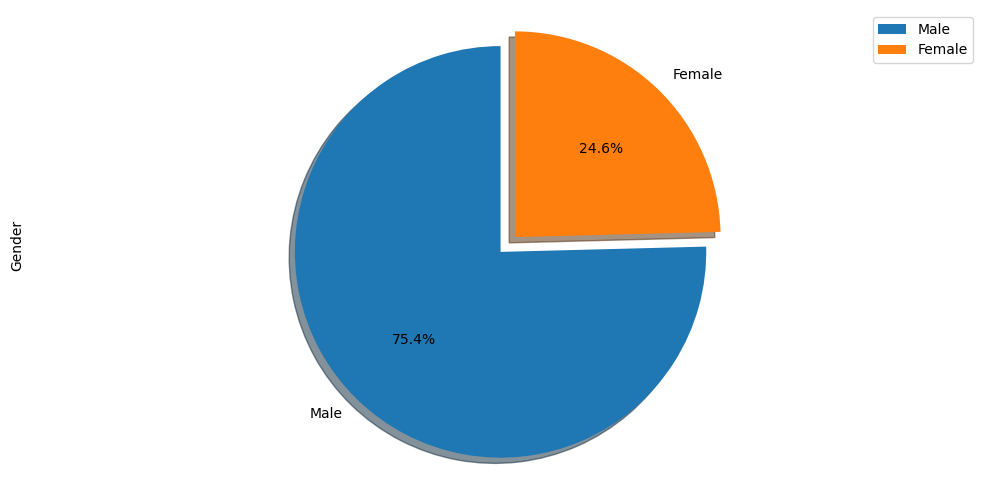

In [9]:
print("Male ",df['Gender'].value_counts()[0])
print("Female ",df['Gender'].value_counts()[1])
fig = df['Gender'].value_counts().plot(kind = "pie", 
                                 autopct = "%1.1f%%", labels=['Male','Female'],
                                 explode=(0,0.1), shadow=True, startangle=90, 
                                 legend = True, figsize=(10,5)
                                )
fig.axis('equal')  
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

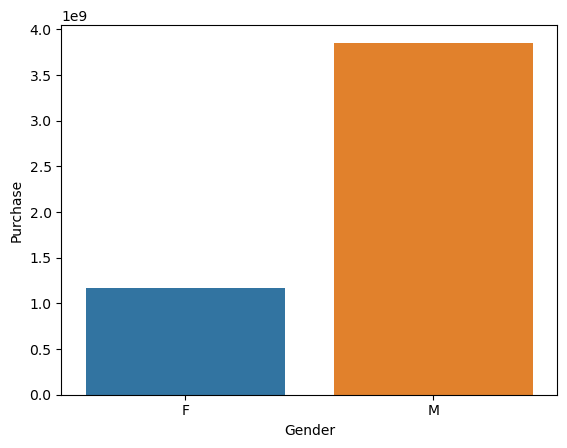

In [10]:
import seaborn as sns
a = df.groupby("Gender")[["Gender" ,"Purchase"]].sum().reset_index()
sns.barplot(data = a, x = "Gender", y =  "Purchase")


*Men's purchasing power is greater than women's purchasing power, even in normal circumstances. This is likely to affect the owner of the money, but there has been a high turnout of men in the store. About 75% of the customers have made sales of men of all ages, The men are generally heading toward products at 8000 - 12,000, we have probably made sales worth more than 4 billion in men and more than 1 billion in ladies *

# 2- Age

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

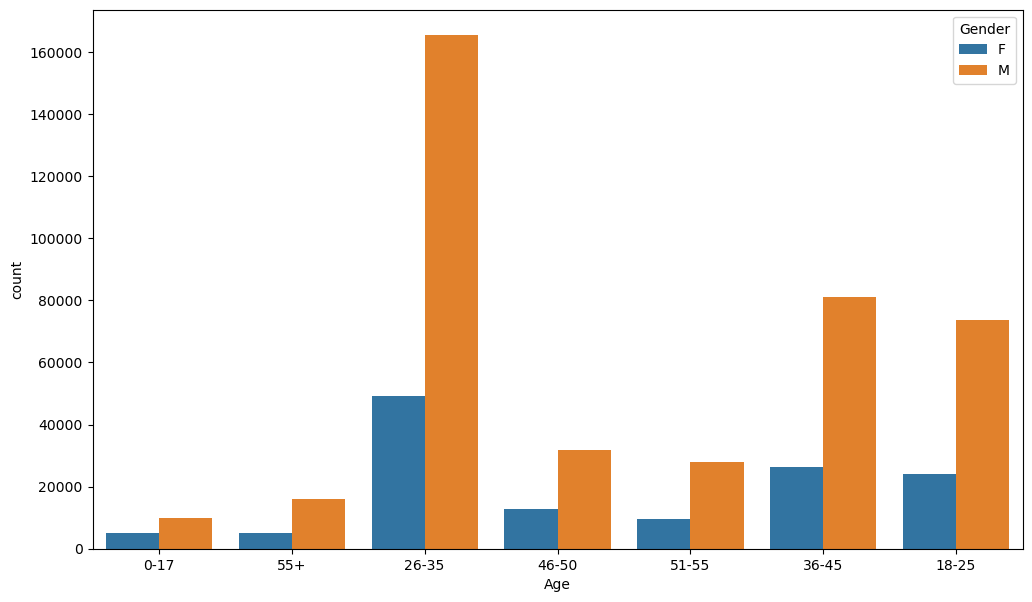

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Age'>

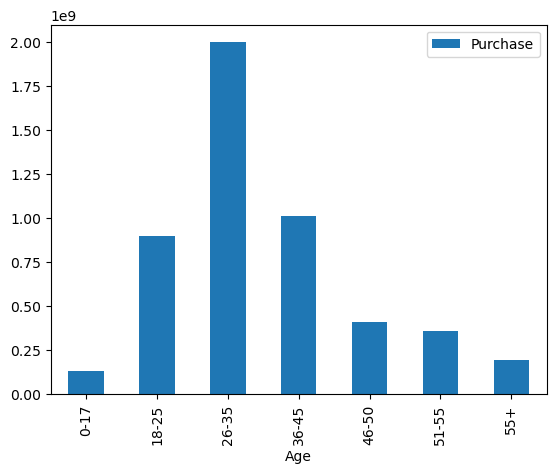

In [12]:
df.groupby("Age")[["Age", "Purchase"]].agg({"Purchase": "sum"}).plot(kind = "bar")

##### Obviously, we can consider that the target age group of our stores is the age group of 26-35 years, we have achieved sales of more than 3 billion in the age group of 26-45 years

# 1- City

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

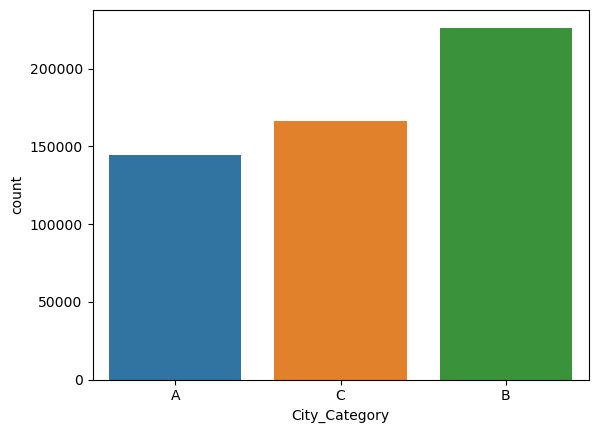

In [14]:
sns.countplot(df['City_Category'])

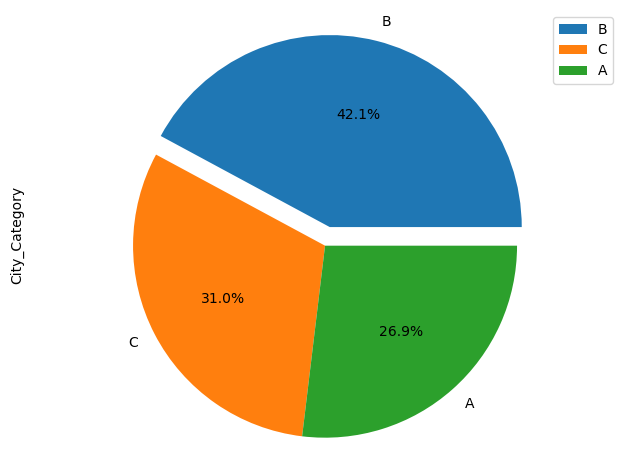

In [15]:
a = df["City_Category"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", explode = (0.1, 0, 0))
a.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

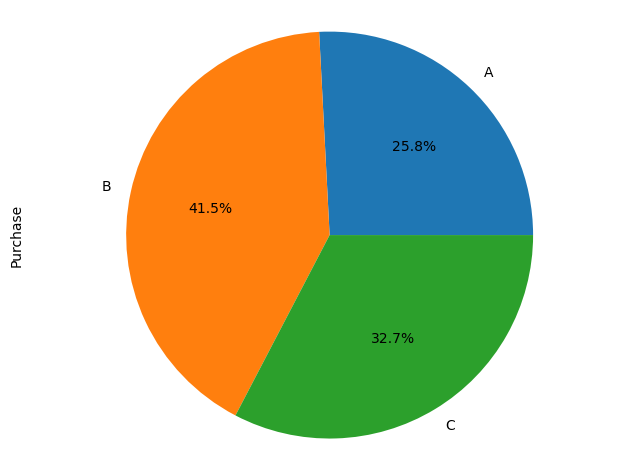

In [16]:
fig = df.groupby("City_Category")["Purchase"].sum().plot(kind = "pie", autopct = "%1.1f%%")
fig.axis('equal')  
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

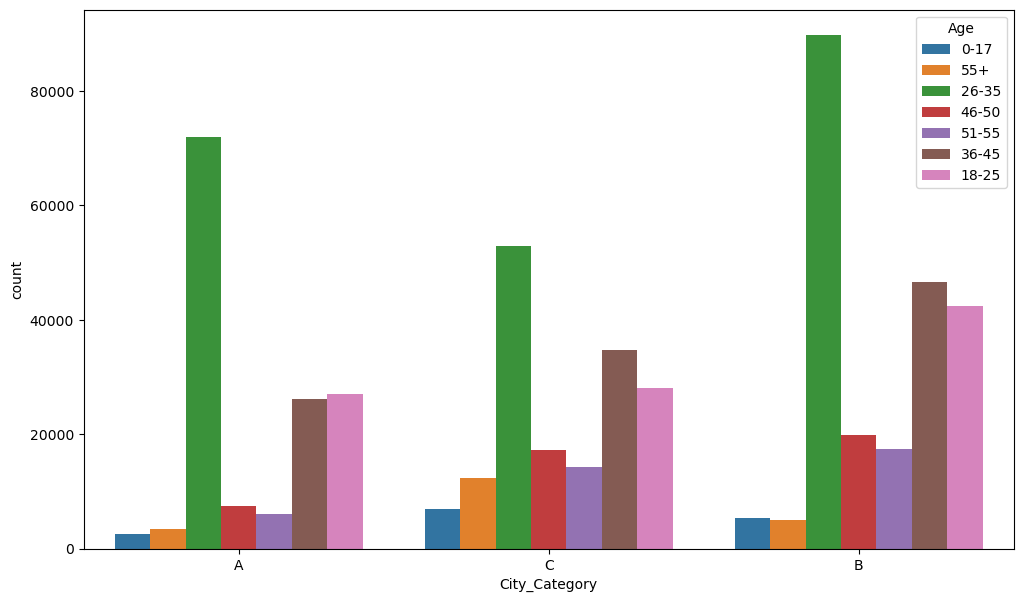

In [17]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'],hue=df['Age'])

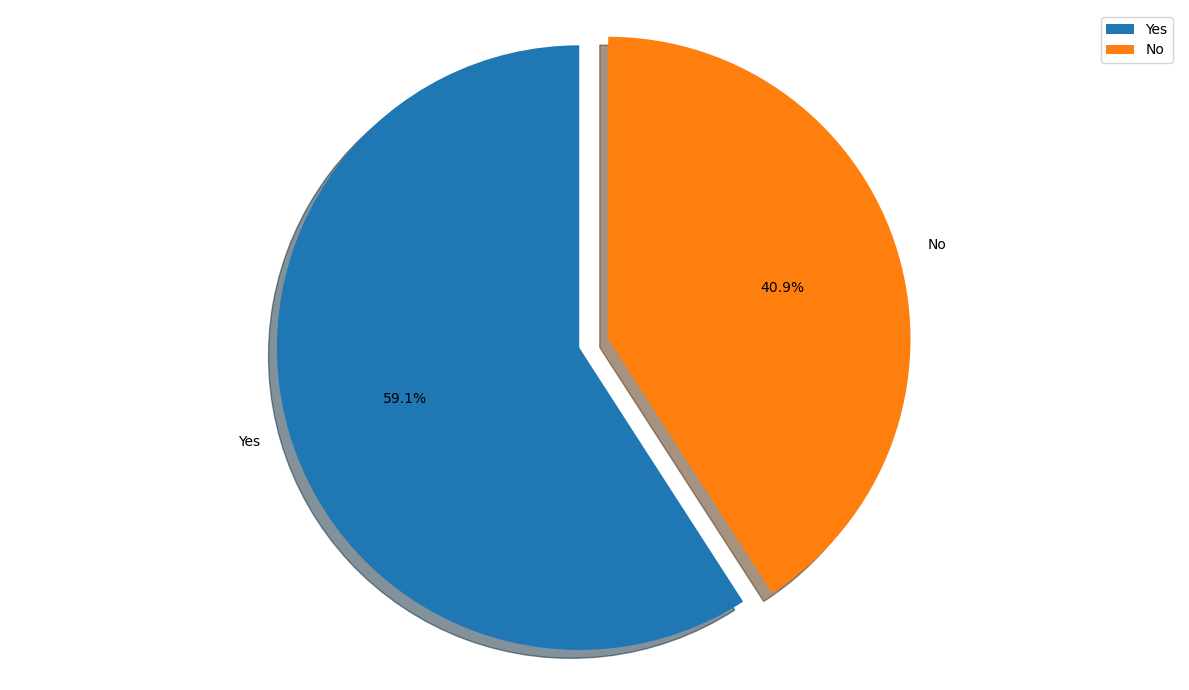

In [18]:
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Marital_Status'].value_counts(),explode=explode, labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

City A is the most cities followed by B and then C, the distribution of ages on the procurement map is very close, we have to focus on that category of work averages of 36-45

##### Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed

# 4-Stability

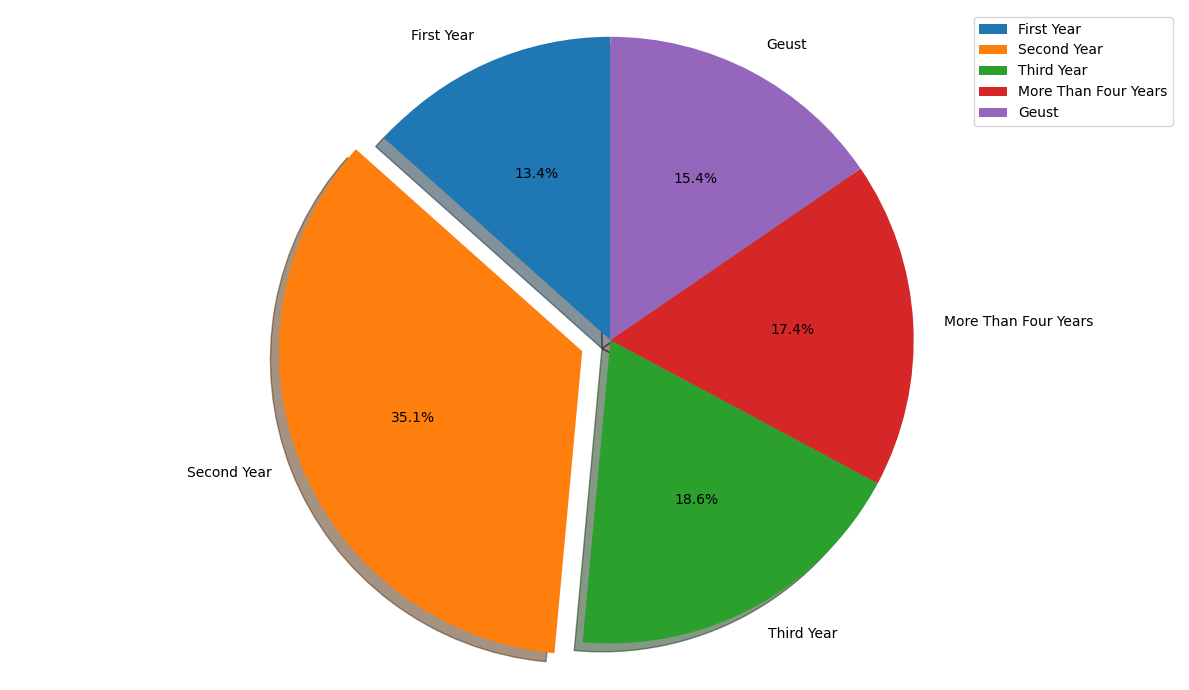

In [19]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
explode = (0, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

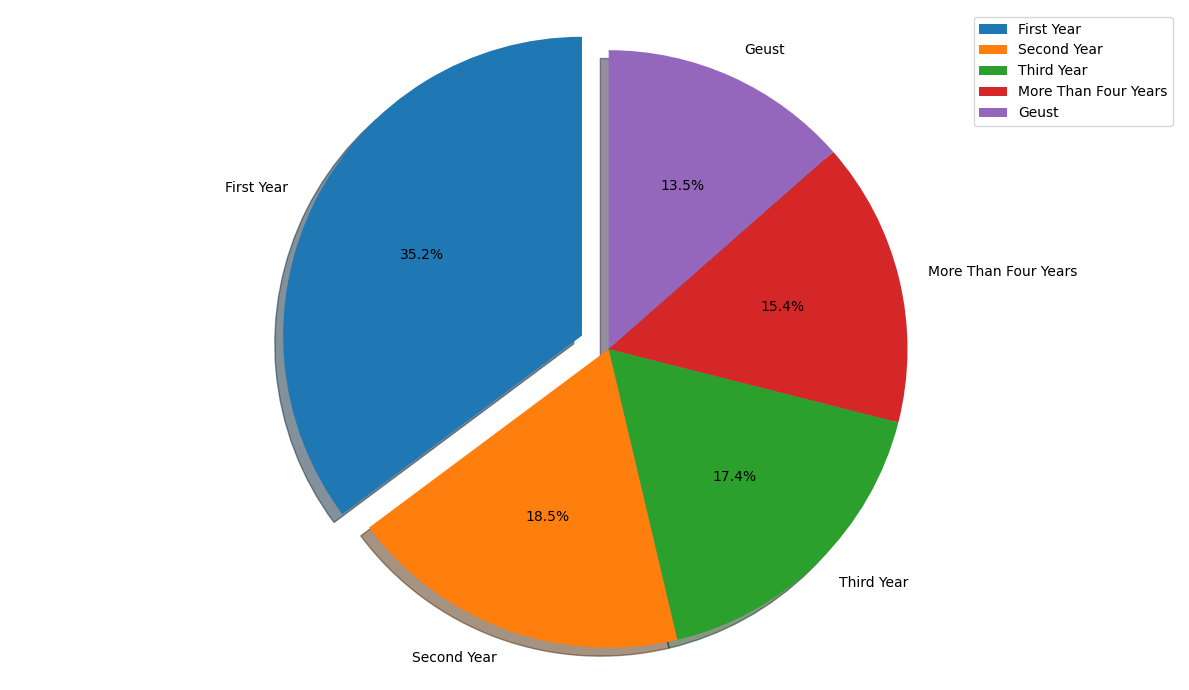

In [20]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Stay_In_Current_City_Years'].value_counts(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

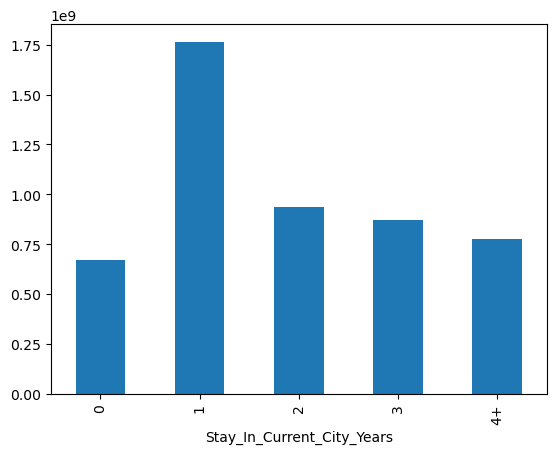

In [21]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind = "bar")

We have worked hard in the past two years and have achieved a large percentage of sales from the new population of cities, but these figures indicate that the older city dwellers have less passion for our products. I do not know in fact look at it for yourselves why old city dwellers did not achieve higher sales of the population New visitors or visitors from outside the city?
We have almost gained about 1.75 billion new city residents only!

# 5-Occupation

Text(0, 0.5, 'Count')

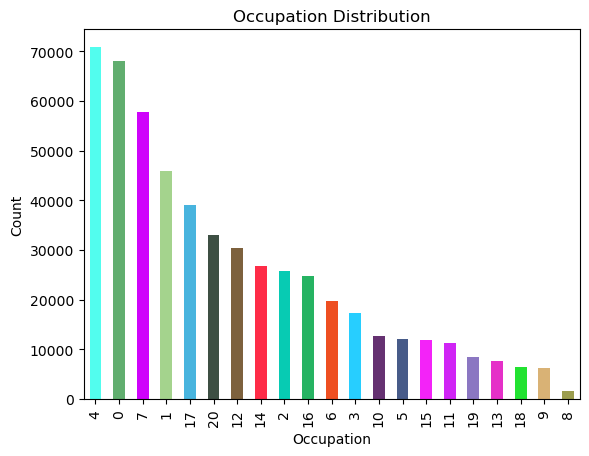

In [22]:
import random
num_colors = len(df['Occupation'].unique())
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

df['Occupation'].value_counts().plot(kind = "bar", color = colors)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

We also note here that purchasing power is closely related to the Occupation in some cases as the first class of the table but there are some differences we will notice when checking the number of purchases and the value of those purchases total

# 6-Products and Catiegories

In [23]:
print("We have",len(df["Product_Category_1"].unique()), "Product Category")

We have 18 Product Category


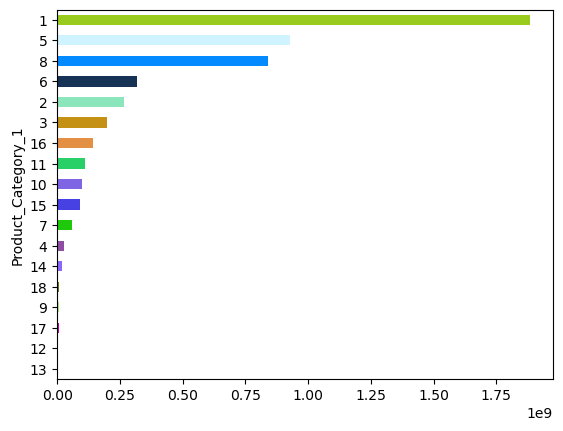

In [24]:
def plots(group,column, plot):
    colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]
    df.groupby(group)[column].sum().sort_values().plot(kind = plot, color = colors)

plots("Product_Category_1", "Purchase", "barh")

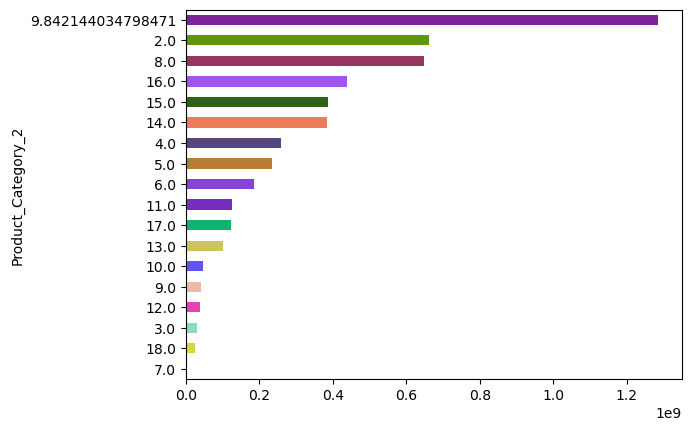

In [25]:
plots("Product_Category_2", "Purchase", "barh")

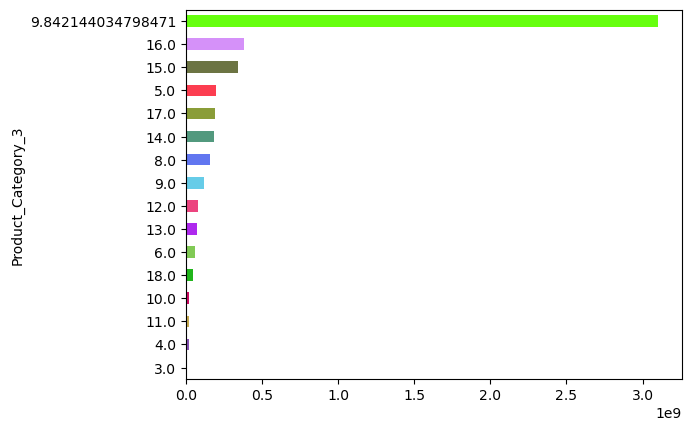

In [26]:
plots("Product_Category_3", "Purchase", "barh")

<AxesSubplot:ylabel='Product_ID'>

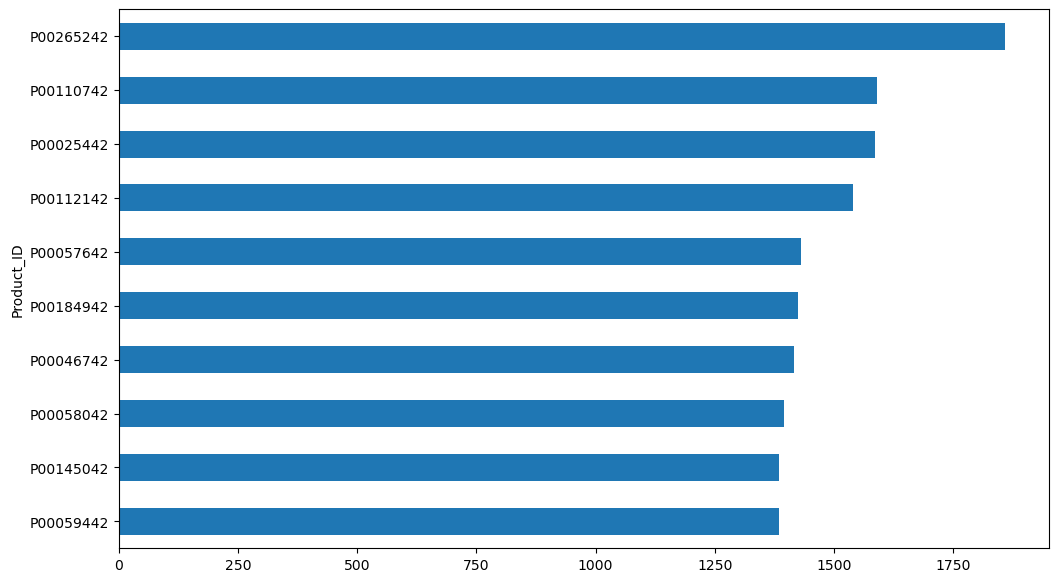

In [27]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values().plot(kind = "barh")

<AxesSubplot:ylabel='Product_ID'>

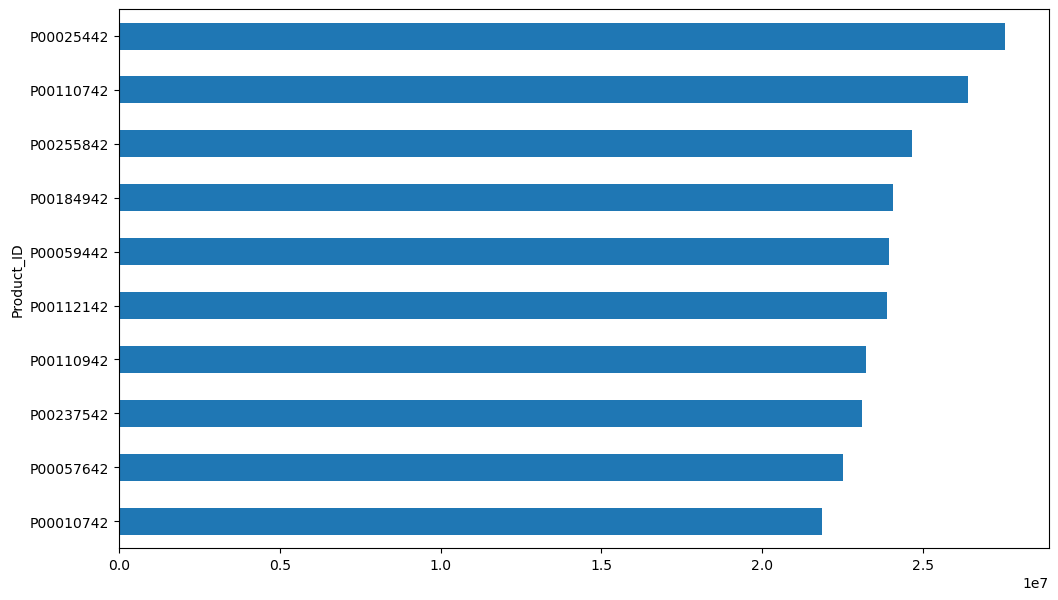

In [28]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'barh')

#### now we have the top 10 products for the top 10 profits , and first 10 category for each products .